<a href="https://colab.research.google.com/github/kytk/AI-MAILs-2022/blob/main/python_2-2_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI-MAILs
## 深層学習入門: 手書き数字の分類

Ver. 20220807

## 本セクションの目標
- MNISTデータセットを用いて手書き数字の分類を行うことで、どのように深層学習を実装するかを学ぶ

## 目次
- A. MNISTデータセット
- B. Tensorflow/Keras を用いた深層学習の実装 (全結合層)
- C. 学習の可視化 
- D. ハイパーパラメータ
- E. 畳み込みニューラルネットワーク

## A. MNISTデータセット
- NIST (National Institute of Standards and Technology) が保有していたデータセットを再構成したデータベース
- 60,000枚の訓練用画像と10,000枚の評価用画像が含まれている

| <img src="https://www.nemotos.net/nb/img/MnistExamples.png" width="500"> |
| --: |
| Wikipediaより引用 |

## B. Tensorflow/Keras を用いた深層学習の実装 (全結合層)
- 深層学習を実装する手順は以下となる

| <img src="https://www.nemotos.net/nb/img/dl_flow.png" width="500"> |
| --: |
| 動かしながら学ぶPyTorchプログラミング入門より引用 |

- この流れに従っていく

- まずは、基本である「全結合層」のみを用いた識別を行い、その後、「畳みこみニューラルネットワーク」を用いた識別を行う

### 1. 必要なパッケージのインポート
- 今回必要なパッケージは以下
    - numpy
    - matplotlib
    - tensorflow
        - keras は tensorflow 2.0 から tensorflow の中に取り込まれた

In [1]:
# 必要なパッケージ、モジュールのインポート

# NumPy
import numpy as np

# Matplotlib
import matplotlib.pyplot as plt

# keras (Tensorflowのフロントエンド)
from tensorflow import keras

# layers と Sequential (層を定義し、層をつなげるために使用)
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# ラベルを one-hotベクトルに変換する関数 to_categorical()
from tensorflow.keras.utils import to_categorical

### 2. データの前処理
- MNISTの画像データはひとつひとつのピクセルの値が0-255の値をとる
- これを0-1の値をとるように変換する

#### 2.1. データの読み込みと確認

In [2]:
# tensorflow の中に mnist データセットが既に入っている
from tensorflow.keras.datasets import mnist

In [3]:
# mnist.load_data() で訓練データとテストデータにわけて格納する
# mnistは、訓練データとテストデータがそれぞれタプルにわかれて入っている
# 訓練データの画像を train_images, 正解ラベルを train_labels に格納する
# テストデータも同じ
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
# train_images について確認する
# まず、型から確認
# numpy.ndarray型
type(train_images)

numpy.ndarray

In [5]:
# shape
# 60000枚の画像、1枚の画像は 28 x 28 で構成
train_images.shape

(60000, 28, 28)

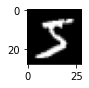

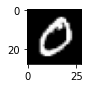

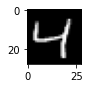

In [6]:
# plt.imshow() を使って実際の画像を確認
# for を使って、最初の3人分のデータを見る
for i in range(3):
    plt.figure(figsize=(1,1))
    plt.imshow(train_images[i], cmap='gray')
    plt.show()
    

In [7]:
# train_labels の内容を確認
# スライシングで train_labels の最初の3つのラベルを取り出す
# 画像とラベルが一致していることを確認
train_labels[0:3]

array([5, 0, 4], dtype=uint8)

In [8]:
# train_labels の shape を確認
# 60000 のデータがある1次元のデータ
train_labels.shape

(60000,)

In [9]:
# 同様にテストデータも確認
# shape
# 10,000枚の画像、1枚の画像は 28 x 28 で構成
test_images.shape

(10000, 28, 28)

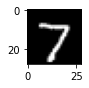

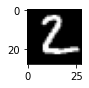

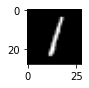

In [10]:
# plt.imshow() を使って実際の画像を確認
# for を使って、最初の3人分のデータを見る
for i in range(3):
    plt.figure(figsize=(1,1))
    plt.imshow(test_images[i], cmap='gray')
    plt.show()
    

In [11]:
# test_labels の内容を確認
# スライシングで test_labels の最初の3つのラベルを取り出す
test_labels[0:3]

array([7, 2, 1], dtype=uint8)

#### 2.2 正解ラベルの one-hotベクトル化
- 正解ラベルを one-hotベクトルに変換する
- `to_categorical()` 関数を使うことで変換できる

In [12]:
# train_labels を one-hotベクトルに変換
train_labels = to_categorical(train_labels)

# test_labels も同様に one-hotベクトルに変換
test_labels = to_categorical(test_labels)

In [13]:
# 新しい train_labels の shape を確認
# 60000行10列の行列になっている
train_labels.shape

(60000, 10)

In [14]:
# train_labels の 最初の3つを見てみる
# 正解 5, 0, 4 に相当するところが 1 になっていることに着目
train_labels[0:3]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [15]:
# test_labels の 最初の3つも確認する
# 正解 7, 2, 1 に相当するところが 1 になっていることに着目
test_labels[0:3]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

#### 2.3 データの正規化
- 深層学習に限らず、データ解析においてデータの範囲をある決まった範囲に変換することを正規化という
- 正規化を行うことで、異なる変数がモデルに与える影響を均等にできる
    - 例: 年齢 (20-80) と 身長 (140-200)
- 今、画像は 0-255 の整数をとるので、これを 0-1 になるように変換する

In [16]:
# dtype 属性で numpy配列内の数字のデータ型がわかる
# uint8 は unsigned integer 8bit 符号なし 8bit 整数 (0-255)
train_images.dtype

dtype('uint8')

In [17]:
# train_images の最小値
# min() メソッドを使えばよい
train_images.min()

0

In [18]:
# train_images の最大値
# max() メソッドを使えばよい
train_images.max()

255

In [19]:
# 0-255で構成されるので、255で割れば、値は 0-1 の間となる
# 255.0 と小数点をつけて割ることで、Pythonは出力を必ず float型としてくれる
# 計算結果を同じ変数名にいれることで、変数を増やすことなく、
train_images = train_images / 255.0
test_images = test_images / 255.0

In [20]:
# train_images の値が本当に0-1になったか確認
# min() と max() を使えばよい
# 最小値
train_images.min()

0.0

In [21]:
# 最大値
train_images.max()

1.0

In [22]:
# dtypeも確認する
# 今回は float64 倍精度浮動小数点数
train_images.dtype

dtype('float64')

### 3. 訓練データとテストデータの作成
- MNISTデータセットは手書き数字6万枚の訓練データセットと手書き数字1万枚のテストデータセットから構成されている
- 「**訓練データ**」「**検証データ**」「**テストデータ**」の3つを準備する
    - 訓練データ: ニューラルネットワークのパラメータを決めるためのデータ
    - 検証データ: 訓練データで得られたパラメータがどの程度の精度があるかを検証するためのデータ
    - テストデータ: ニューラルネットワークの汎用性を評価するためのデータ
        - 訓練で使ったものと別のセットを使わないといけない
- Tensorflow には、`model.fit()` メソッドに、`validation_split` という引数が準備されており、ここで訓練データの何割を検証データとして使用するかを設定できる
    - 今回は訓練データの2割を検証データとして使用することとする (`validation_split=0.2`)

### 4. ニューラルネットワークの定義

- ここで、自分がイメージするニューラルネットワークモデルを定義する
- 下図の赤線の部分, すなわち **順伝播 forwad propagation** のモデルを構築

<img src="https://www.nemotos.net/nb/img/dl_overview_4.png" width="500">

- 今は以下のように定義する
    - 層と層の結合は全結合とする
    - 第1層は画像が 28 x 28 で構成されているので、そのピクセル数(784)がユニット数
    - 第2層のユニット数は 128 とする
    - 第2層の活性化関数は **ReLU**関数 とする
    - 過学習を防ぐため、全結合層の2割は drop とする (Dropout=0.2)
    - このモデルとしては、最終の出力は 0-9 の10のクラスを分類したい
    - そのため、第3層は 出力層に渡す準備として、ユニット数は 10 とする
    - 第3層の出力はそのまま出力層の入力とする (Tensorflow ではそのように構築することが勧められている)
    - 出力層の活性化関数は多クラス分類に適した **Softmax**関数 とする

- 活性化関数の特徴

| 関数名 | 特徴 | 
| :-- | :-- |
| ReLU | 隠れ層に使うことで、非線形問題を解くことができるようになる <br> Sigmoid関数は0-1の値しかとらないので層が厚くなるほど誤差が小さくなっていき、<br>入力層まで誤差が伝搬する前に誤差が消失するという勾配消失問題が発生する |
| Sigmoid | 0-1の間の確率で表現可能なため2クラス分類の出力層に用いる |
| Softmax | 各クラスの確率の総和が1となるように正規化された関数であるため多クラス分類の出力層に用いる |

<img src="https://www.nemotos.net/nb/img/nn_model.png" width="500"> 

- これらはTensorflow/Kerasでは以下のように定義できる
    - プリセットで準備されている **Sequential**モデル を選択する(Sequential: 連続する)
    - 入力画像は **layers.Flatten** を使うことでベクトルにできる
    - 全結合層は **layers.Dense** で規定できる

In [23]:
# モデルを定義
# Sequentialモデルを使用すると、model.addとすればどんどん付け加えられる
# ここはあくまでもモデルを作っているだけなので、データはまだ入力していない。（計算式を作るイメージ。データの代入はこれから）

model = Sequential()                
model.add(layers.Flatten(input_shape=(28, 28)))     # 入力画像の dimension を指定 今の場合は(28,28)
model.add(layers.Dense(128, activation='relu'))     # 第2層のユニット数を 128 にし、 活性化関数は ReLU とする
model.add(layers.Dropout(0.2))                      # 過学習防止のため、結合層の20%を dropout
model.add(layers.Dense(10))                         # 第3層のユニット数を 10 にする
model.add(layers.Softmax())                         # 出力層でSoftmax関数 で処理して結果を出力する


In [24]:
# どのようなモデルになったかを model.summary() で知ることができる
model.summary()
# パラメータ数
#   Flatten: 入力層なのでなし
#   Dense 100480 ← 入力層 784 * 第2層 128 + 第2層のそれぞれのユニットに対する定数項 128
#   Dense 1290 ← 第2層 128 * 第3層 10 + 第3層のそれぞれのユニットに対する定数項 10
# 合計 101,770 ものパラメータをこれから学習させることになる
# パラメータが多いため、パラメータ推定のために必要なデータ数が膨大となる

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
 softmax (Softmax)           (None, 10)                0         
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [25]:
# 訓練データを今作ったモデルに代入して予測値を計算 (forward propagation)
# model() の後に .numpy() をつけることで、NumPy配列に変換する
predictions = model(train_images).numpy()

In [26]:
# predictions を表示
# この時点では、モデルを決めただけで、重みはランダムに割り当てられている
# そのため、各クラスの確率はおおよそ 1/10 あたりになるはず
# ひとつの数字の画像が1行、列が 0 - 9 の数字である確率
# 一切学習はしていないことに注意！train_labelsはまだ使われていない
predictions

array([[0.06471205, 0.10286956, 0.11541005, ..., 0.06831832, 0.05827938,
        0.09630585],
       [0.06473604, 0.12180885, 0.13471016, ..., 0.05807921, 0.03624715,
        0.10056355],
       [0.12268464, 0.06978691, 0.14503816, ..., 0.11545829, 0.06939755,
        0.05252387],
       ...,
       [0.09305625, 0.10252103, 0.12676688, ..., 0.09257276, 0.09829233,
        0.08599012],
       [0.07921147, 0.17395349, 0.08184095, ..., 0.07807615, 0.05453013,
        0.14835764],
       [0.09926322, 0.10127142, 0.14023137, ..., 0.11610666, 0.0924319 ,
        0.06399535]], dtype=float32)

### 5. 損失関数と最適化関数の定義
- 次に損失関数と最適化関数(オプティマイザ)を決定する
- その後、model.compile() で損失関数と最適化関数をモデルに組み込む
- 下図の赤線の部分、すなわち **逆伝播 back propagation** のモデルを構築

<img src="https://www.nemotos.net/nb/img/dl_overview_5.png" width="500">

- よく用いられる損失関数

| 目的 | 関数名 | Function Name | 損失関数名<br>(Tensorflow) | 損失関数名(PyTorch) |
| :-- | :-- | :-- | :-- | :-- |
| 回帰 | 平均二乗誤差 | Mean Squared Error | mean_squared_error | nn.MSELoss |
| 2クラス分類 | バイナリ交差エントロピー | Binary Cross Entropy | binary_crossentropy | nn.BCELoss |
| 多クラス分類 | ソフトマックス交差エントロピー | Softmax Cross Entropy | categorical_crossentropy (one-hot vector用)<br> sparse_categorical_crossentropy | nn.CrossEntropyLoss |

In [27]:
# 損失関数には、ソフトマックス交差エントロピー誤差を使用
# 今回は正解ラベルは one-hotベクトル として準備していることから、
# keras.losses.CategoricalCrossentropy() を使用する
# one-hotベクトルでない場合は、
# keras.losses.SparseCategoricalCrossentropy() を使用する
loss_fn = keras.losses.CategoricalCrossentropy()

In [31]:
# 今の場合、予測値はいずれも 0.1 程度
# 損失は、-log(0.1) ≒ 2.3 程度になるはず
loss_fn(train_labels, predictions).numpy()

2.4454427

In [32]:
# 参考
# -log(0.1) を計算
-np.log(0.1)

2.3025850929940455

In [33]:
# 最適化関数(オプティマイザ)として、Adam, RMSpropなどがある。ここでは、RMSprop を選択する
# 損失関数は先程定義した交差エントロピー誤差を使用する
# モデルの評価は 後ほど、accuracy で行う
model.compile(optimizer='rmsprop',
             loss = loss_fn,
             metrics = ['accuracy'])

### 6. 学習・評価
- `model.fit()` で学習させる
- この時、訓練データと訓練データの正解ラベルをモデルに与える
- `validation_split` で訓練データのうち検証に使う割合を指定する
- `batch_size` でバッチサイズを指定する
- `epochs` で何回学習するかを指定する
- 学習の結果を変数 history に代入してあとで可視化する

In [34]:
# loss: 損失
# accuracy: 正答率
# 10回の繰り返しで、loss が少しずつ減少、accuracy は増加
#
# 訓練データ,訓練データの正解ラベルをまず入力 (train_images, train_labels)
# 訓練データの2割を検証データとして使用 (validation_split=0.2)
# ミニバッチ学習として、バッチサイズは128に設定 (batch_size=128)
# 繰り返し回数は10回 (epochs=10)                            
history = model.fit(train_images,train_labels,
                    validation_split=0.2,
                    batch_size=128,
                    epochs=10)

Epoch 1/10
375/375 [==============================] - 3s 6ms/step - loss: 0.4173 - accuracy: 0.8822 - val_loss: 0.2099 - val_accuracy: 0.9403
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2070 - accuracy: 0.9395 - val_loss: 0.1536 - val_accuracy: 0.9577
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1579 - accuracy: 0.9537 - val_loss: 0.1272 - val_accuracy: 0.9638
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1299 - accuracy: 0.9619 - val_loss: 0.1169 - val_accuracy: 0.9653
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1130 - accuracy: 0.9665 - val_loss: 0.1050 - val_accuracy: 0.9699
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0998 - accuracy: 0.9709 - val_loss: 0.0987 - val_accuracy: 0.9722
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0876 - accuracy: 0.9738 - val_loss: 0.0967 - val_accuracy: 0.9720
Epoch 

- `model.evaluate(テストデータ,テストラベル)`を使うことで、modelの性能を表示できる

In [35]:
# model.evaluateの引数に test_images, test_labels を指定
# verbose =1 とすると、学習のときと同じような結果表示になる
model.evaluate(test_images,test_labels, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.0812 - accuracy: 0.9771


[0.08123777061700821, 0.9771000146865845]

## C. 学習の視覚化
- matplotlib を用いて学習の様子を視覚化する
- 変数 history.history の中に loss と accuracy の10回の値が格納されている

In [36]:
# history.historyの中を見てみる
# ディクショナリ型
# キーが 'loss', 'accuracy', 'val_loss', 'val_accuracy'
# val_ は 検証データでの結果
# 値が 損失値と正答率の推移
history.history

{'accuracy': [0.8821666836738586,
  0.9395416378974915,
  0.9537291526794434,
  0.9618750214576721,
  0.9664791822433472,
  0.9709374904632568,
  0.9737708568572998,
  0.976520836353302,
  0.9773958325386047,
  0.979687511920929],
 'loss': [0.4172958433628082,
  0.2070380598306656,
  0.15785957872867584,
  0.12992164492607117,
  0.11303789168596268,
  0.09984830021858215,
  0.08760830760002136,
  0.079587422311306,
  0.07579147070646286,
  0.06734310835599899],
 'val_accuracy': [0.9403333067893982,
  0.9576666951179504,
  0.9637500047683716,
  0.9653333425521851,
  0.9699166417121887,
  0.9721666574478149,
  0.972000002861023,
  0.9738333225250244,
  0.9755833148956299,
  0.9744166731834412],
 'val_loss': [0.20988240838050842,
  0.15364770591259003,
  0.1271950751543045,
  0.11690972000360489,
  0.10499134659767151,
  0.09871707856655121,
  0.09669915586709976,
  0.09635485708713531,
  0.09342494606971741,
  0.09114311635494232]}

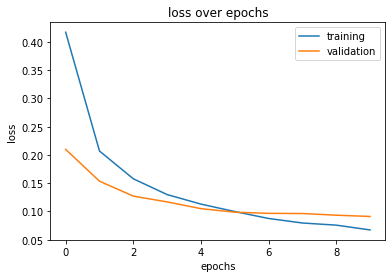

In [38]:
# 訓練データの損失値 loss と検証データの損失値 val_loss をグラフとして表示
# 訓練データの loss の値を取り出して train_loss に代入
# ディクショナリ型の値は 変数名['キー名']　で取り出せる
train_loss = history.history['loss']
# 同様に検証データの loss の値を取り出して val_loss に代入
val_loss = history.history['val_loss']

# train_loss と val_loss をプロットする
plt.plot(train_loss, label='training')
plt.plot(val_loss, label='validation')
# グラフのタイトル
plt.title('loss over epochs')
# x軸の名前
plt.xlabel('epochs')
# y軸の名前
plt.ylabel('loss')
# 凡例
plt.legend()
# これらをすべてまとめて表示
plt.show()

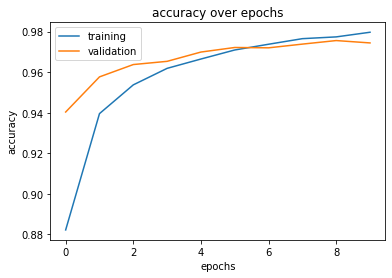

In [39]:
# 訓練データの正答率 accuracy と検証データの正答率 val_accuracy をグラフとして表示
# 訓練データの accuracy を取り出して train_accuracy に代入
train_accuracy = history.history['accuracy']
# 同様に検証データの accuracy を取り出して val_accuracy に代入
val_accuracy = history.history['val_accuracy']

# train_accuracy と val_accuracy をプロットする
plt.plot(train_accuracy, label='training')
plt.plot(val_accuracy, label='validation')
# グラフのタイトル
plt.title('accuracy over epochs')
# x軸の名前
plt.xlabel('epochs')
# y軸の名前
plt.ylabel('accuracy')
# 凡例
plt.legend()
# これらをすべてまとめて表示
plt.show()

## D. ハイパーパラメータ
- 深層学習の実装の例を示したが、自身のデータで解析する際、人間が設定しなければならないパラメータがいくつかある
- これらを**ハイパーパラメータ**という
- 具体的には以下のようなものが挙げられる
    - 中間層のユニット数
    - Dropout率
    - 中間層の活性化関数
    - 損失関数
    - 最適化関数
    - バッチサイズ
    - エポック数
- より精度の高いモデルを構築するために、これらを吟味していくことが必要となる

## 練習問題

- 以下のパラメータでモデルを構築し、学習させた時、テストデータの正答率がどう変わるかを見てみてください

- 中間層のユニット数: 16
- 中間層の活性化関数: 'relu' ではなく 'sigmoid'
- エポック数: 3

In [ ]:
# 必要なパッケージのインポート
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# データの準備
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# データの正規化
train_images = train_images / 255.0
test_images = test_images / 255.0

# 変数 model を初期化
model = []

# モデルの構築
model = Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(ここに代入, activation=ここに代入)) #中間層のユニット数と活性化関数
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10))
model.add(layers.Softmax())

# 損失関数には、交差エントロピー誤差を使用
# 正解ラベルを one-hot ベクトルに変換していないため、
# SparseCategoricalCrossentropy()を使う
loss_fn = keras.losses.SparseCategoricalCrossentropy()

# モデルの最適化
# 最適化関数には、RMSprop を使用
model.compile(optimizer='rmsprop',
             loss = loss_fn,
             metrics = ['accuracy'])

# モデルの要約
model.summary()

In [ ]:
# モデルの学習
history = model.fit(train_images,train_labels,
                    validation_split=0.2,
                    batch_size=128,
                    epochs=ここに代入) #エポック数

# loss の推移
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label='training')
plt.plot(val_loss, label='validation')
plt.title('loss over epochs')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# accuracy の推移
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(train_accuracy, label='training')
plt.plot(val_accuracy, label='validation')
plt.title('accuracy over epochs')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# テストデータでの評価
model.evaluate(test_images,test_labels, verbose=1)


## E. 畳み込みニューラルネットワーク Convolutional Neural Network (CNN)

- 全結合層のニューラルネットワークよりも精度が向上
- 畳み込みとプーリングを複数回施行していく
    - イメージ: 1回目の畳み込みで「斜め」「横」「縦」などの形状を学習、プーリングで特徴量マップをダウンサンプリング、2回めの畳み込みで、「斜め」と「横」の組み合わせなど、もう少し大きな形状を学習、プーリングで特徴量マップをさらにダウンサンプリング、3回目の畳み込みで、全体の空間的な位置関係を学習
- CNNの入力は(画像の縦のピクセル数, 画像の横のピクセル数, 画像のチャンネル数) で指定する
    - MNISTの手書き数字の画像は、縦28, 横28, 白黒(チャンネルの次元数は1) なので、(28,28,1)となる
- 畳み込みに使うフィルタの種類を filters で設定する。filters=32は、32種類のフィルタを使用するということである。kernel_size=3 は、フィルタの大きさが3x3の行列ということを示す
    - 32種類のフィルタを使うということは、特徴量マップは32種類できるということである。
- 最大プーリングに使う pool_size は特徴量マップを小さく分割する量を指定する。pool_size=2 は、特徴量マップを2x2ごとに分割し、各領域の最大値から新たな出力特徴量マップを生成する
- 以下を実行し、出力されるモデルの要約と上の説明を比較すると理解が進む

In [1]:
# 必要なモジュールは全結合層の時と同じ
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# モデルを初期化する
model = []

# Sequential関数を使って、モデルに層を設定していく
model = Sequential()

# 32種類の 3x3 のフィルタを使って畳み込みを行う
model.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu',
                        input_shape=(28, 28, 1)))
# 2x2 で分割し最大値プーリング演算を行う
# これにより、出力される特徴量マップは 13x13x32 になる
model.add(layers.MaxPooling2D(pool_size=2))

# 64種類の 3x3 のフィルタを使って畳み込みを行う
model.add(layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
# 2x2 で分割し最大値プーリング演算を行う
# これにより、出力される特徴量マップは 5x5x64 になる
model.add(layers.MaxPooling2D(pool_size=2))

# 128種類の 3x3 のフィルタを使って畳み込みを行う
# 特徴量マップは 3x3x128 となり、縦と横は十分小さいので、プーリングは必要ない
model.add(layers.Conv2D(filters=128, kernel_size=3, activation='relu'))

# 全結合層に投入するために、3次元のデータを1次元に変換する
model.add(layers.Flatten())

# ソフトマックス関数を使って、10クラス分類を行う
model.add(layers.Dense(10, activation='softmax'))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 1152)              0

- CNNの計算は時間がかかる
- Google Colabでは、GPUを使用することができる
    - メニューの「ランタイム」→「ランタイムのタイプを変更」
    - ハードウェアアクセラレータを"GPU"に変更

<img src="https://www.nemotos.net/nb/img/colab_gpu.png" width="300">

In [3]:
# データの準備
# mnistデータセットを入手
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# データの正規化
# 訓練データを、3次元のテンソルが60000枚スタックしているという形状に変更する
train_images = train_images.reshape((60000, 28, 28, 1))
# 画素値を 0-255 から、 0-1 に正規化する
train_images = train_images / 255.0

# テストデータも同様
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images / 255.0

# モデルの最適化
# オプティマイザはRMSpropを使用する
# 損失関数は sparse_categorical_crossentropy を使用する
# モデルの評価には accuracy を使用する
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# モデルの学習
# 学習の際に訓練データの2割を検証データに使用する
# ミニバッチ学習を行う。バッチサイズは128
# エポック数は5とし、5回学習させる
history = model.fit(train_images,train_labels,
                    validation_split=0.2,
                    batch_size=128,
                    epochs=5)



11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/5
375/375 [==============================] - 3s 6ms/step - loss: 0.2972 - accuracy: 0.9200 - val_loss: 0.0759 - val_accuracy: 0.9783
Epoch 2/5
375/375 [==============================] - 2s 6ms/step - loss: 0.0598 - accuracy: 0.9824 - val_loss: 0.0503 - val_accuracy: 0.9840
Epoch 3/5
375/375 [==============================] - 2s 6ms/step - loss: 0.0382 - accuracy: 0.9886 - val_loss: 0.0485 - val_accuracy: 0.9868
Epoch 4/5
375/375 [==============================] - 2s 6ms/step - loss: 0.0287 - accuracy: 0.9910 - val_loss: 0.0338 - val_accuracy: 0.9914
Epoch 5/5
375/375 [==============================] - 2s 6ms/step - loss: 0.0209 - accuracy: 0.9939 - val_loss: 0.0395 - val_accuracy: 0.9902


In [4]:
# テストデータでの評価
# 全結合層のときよりも、結果が改善していることに着目
model.evaluate(test_images,test_labels, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.0357 - accuracy: 0.9893


[0.03569681569933891, 0.989300012588501]

## 復習

- 授業では手書き文字の識別を行いました
- fashion-mnist といって、洋服や小物などを集めた画像のデータベースがあります

| <img src="https://www.nemotos.net/nb/img/fashion-mnist-sprite.png" width=400> |
| --: |
| [https://github.com/zalandoresearch/fashion-mnist](https://github.com/zalandoresearch/fashion-mnist)より引用 |

- MNISTの手書き文字と同じサイズで、訓練データとテストデータの数も同じです
- 種類も10クラスです
    0. T-シャツ/トップ (T-shirt/top)
    1. ズボン (Trouser)
    2. プルオーバー (Pullover)
    3. ドレス (Dress)
    4. コート (Coat)
    5. サンダル (Sandal)
    6. シャツ (Shirt)
    7. スニーカー (Sneaker)
    8. バッグ (Bag)
    9. アンクルブーツ (Ankle boot)
- 全結合層とCNNでどれだけ結果が違うか検証してみましょう



Model Summary
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
 softmax (Softmax)           (None, 10)                0         
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
375/375 [=========

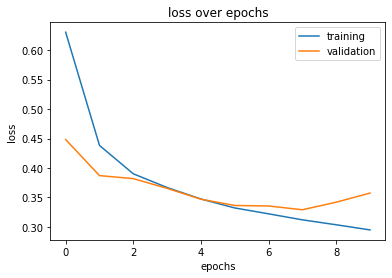

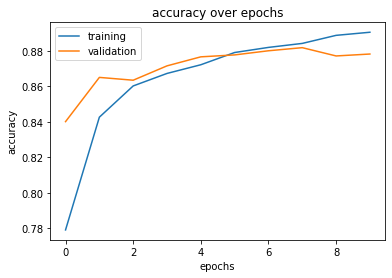

Evaluate with test data
313/313 [==============================] - 1s 2ms/step - loss: 0.3811 - accuracy: 0.8725


[0.3811051547527313, 0.8725000023841858]

In [5]:
# 全結合層

##### 必要なモジュールのインポート
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


##### データの準備
# fashion-mnistデータセットを入手
from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# データの正規化
# 訓練データを、3次元のテンソルが60000枚スタックしているという形状に変更する
train_images = train_images.reshape((60000, 28, 28, 1))
# 画素値を 0-255 から、 0-1 に正規化する
train_images = train_images / 255.0

# テストデータも同様
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images / 255.0


##### モデルの構築 (全結合層とCNNの違いはここだけ！)
# モデルを初期化する
model = []

# Sequential関数を使って、モデルに層を設定していく
model = Sequential()

# 28x28の画像を1次元に変換する
model.add(layers.Flatten(input_shape=(28, 28)))

# 隠れ層のユニット数は128ユニット、活性化関数はReLU
model.add(layers.Dense(128, activation='relu')) 

# Dropout率を0.2で設定
model.add(layers.Dropout(0.2))

# 出力層は10クラス分類なので10、ソフトマックス関数で分類
model.add(layers.Dense(10))
model.add(layers.Softmax())

# モデルのサマリを表示
print('Model Summary')
print(model.summary())


#### モデルの最適化
# オプティマイザはRMSpropを使用する
# 損失関数は sparse_categorical_crossentropy を使用する
# モデルの評価には accuracy を使用する
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


#### モデルの学習

# history の初期化
history = []

# 学習の際に訓練データの2割を検証データに使用する
# ミニバッチ学習を行う。バッチサイズは128
# エポック数は10とし、10回学習させる
history = model.fit(train_images,train_labels,
                    validation_split=0.2,
                    batch_size=128,
                    epochs=10)


##### 損失値のグラフ表示
# 訓練データの損失値 loss と検証データの損失値 val_loss をグラフとして表示
# 訓練データの loss の値を取り出して train_loss に代入
# ディクショナリ型の値は 変数名['キー名']　で取り出せる
train_loss = history.history['loss']
# 同様に検証データの loss の値を取り出して val_loss に代入
val_loss = history.history['val_loss']

# train_loss と val_loss をプロットする
plt.plot(train_loss, label='training')
plt.plot(val_loss, label='validation')
# グラフのタイトル
plt.title('loss over epochs')
# x軸の名前
plt.xlabel('epochs')
# y軸の名前
plt.ylabel('loss')
# 凡例
plt.legend()
# これらをすべてまとめて表示
plt.show()


##### 正答率 のグラフ表示
# 訓練データの accuracy を取り出して train_accuracy に代入
train_accuracy = history.history['accuracy']
# 同様に検証データの accuracy を取り出して val_accuracy に代入
val_accuracy = history.history['val_accuracy']

# train_accuracy と val_accuracy をプロットする
plt.plot(train_accuracy, label='training')
plt.plot(val_accuracy, label='validation')
# グラフのタイトル
plt.title('accuracy over epochs')
# x軸の名前
plt.xlabel('epochs')
# y軸の名前
plt.ylabel('accuracy')
# 凡例
plt.legend()
# これらをすべてまとめて表示
plt.show()

#### テストデータでの評価
print('Evaluate with test data')
model.evaluate(test_images,test_labels, verbose=1)


Model Summary
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten_3 (Flatten)         (None, 1152

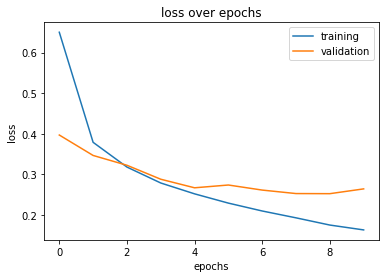

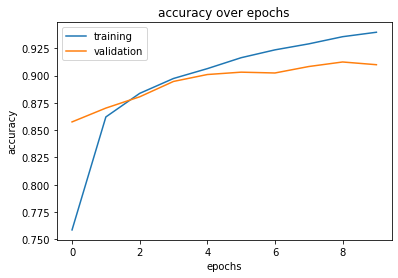

Evaluate with test data
313/313 [==============================] - 1s 3ms/step - loss: 0.2736 - accuracy: 0.9085


[0.27361565828323364, 0.9085000157356262]

In [6]:
# CNN

##### 必要なモジュールのインポート
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


##### データの準備
# fashion-mnistデータセットを入手
from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# データの正規化
# 訓練データを、3次元のテンソルが60000枚スタックしているという形状に変更する
train_images = train_images.reshape((60000, 28, 28, 1))
# 画素値を 0-255 から、 0-1 に正規化する
train_images = train_images / 255.0

# テストデータも同様
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images / 255.0


##### モデルの構築 (全結合層とCNNの違いはここだけ！)
# モデルを初期化する
model = []

# Sequential関数を使って、モデルに層を設定していく
model = Sequential()

# 32種類の 3x3 のフィルタを使って畳み込みを行う
model.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu',
                        input_shape=(28, 28, 1)))
# 2x2 で分割し最大値プーリング演算を行う
# これにより、出力される特徴量マップは 13x13x32 になる
model.add(layers.MaxPooling2D(pool_size=2))

# 64種類の 3x3 のフィルタを使って畳み込みを行う
model.add(layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
# 2x2 で分割し最大値プーリング演算を行う
# これにより、出力される特徴量マップは 5x5x64 になる
model.add(layers.MaxPooling2D(pool_size=2))

# 128種類の 3x3 のフィルタを使って畳み込みを行う
# 特徴量マップは 3x3x128 となり、縦と横は十分小さいので、プーリングは必要ない
model.add(layers.Conv2D(filters=128, kernel_size=3, activation='relu'))

# 全結合層に投入するために、3次元のデータを1次元に変換する
model.add(layers.Flatten())

# ユニット数128の隠れ層を使用する。活性化関数は ReLU
model.add(layers.Dense(128,activation='relu'))

# Dropout率を0.2で設定
model.add(layers.Dropout(0.2))

# ソフトマックス関数を使って、10クラス分類を行う
model.add(layers.Dense(10, activation='softmax'))

# モデルのサマリを表示
print('Model Summary')
print(model.summary())


#### モデルの最適化
# オプティマイザはRMSpropを使用する
# 損失関数は sparse_categorical_crossentropy を使用する
# モデルの評価には accuracy を使用する
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


#### モデルの学習
# history.history の初期化
# hisotry.historyは dict型
history=[]

# 学習の際に訓練データの2割を検証データに使用する
# ミニバッチ学習を行う。バッチサイズは128
# エポック数は10とし、10回学習させる
history = model.fit(train_images,train_labels,
                    validation_split=0.2,
                    batch_size=128,
                    epochs=10)


##### 損失値のグラフ表示
# 訓練データの損失値 loss と検証データの損失値 val_loss をグラフとして表示
# 訓練データの loss の値を取り出して train_loss に代入
# ディクショナリ型の値は 変数名['キー名']　で取り出せる
train_loss = history.history['loss']
# 同様に検証データの loss の値を取り出して val_loss に代入
val_loss = history.history['val_loss']

# train_loss と val_loss をプロットする
plt.plot(train_loss, label='training')
plt.plot(val_loss, label='validation')
# グラフのタイトル
plt.title('loss over epochs')
# x軸の名前
plt.xlabel('epochs')
# y軸の名前
plt.ylabel('loss')
# 凡例
plt.legend()
# これらをすべてまとめて表示
plt.show()


##### 正答率 のグラフ表示
# 訓練データの accuracy を取り出して train_accuracy に代入
train_accuracy = history.history['accuracy']
# 同様に検証データの accuracy を取り出して val_accuracy に代入
val_accuracy = history.history['val_accuracy']

# train_accuracy と val_accuracy をプロットする
plt.plot(train_accuracy, label='training')
plt.plot(val_accuracy, label='validation')
# グラフのタイトル
plt.title('accuracy over epochs')
# x軸の名前
plt.xlabel('epochs')
# y軸の名前
plt.ylabel('accuracy')
# 凡例
plt.legend()
# これらをすべてまとめて表示
plt.show()

#### テストデータでの評価
print('Evaluate with test data')
model.evaluate(test_images,test_labels, verbose=1)
